# Задание

Проведите вычислительные эксперимент - для заданной функции Растригина найдите среднее и минимальное значение целевой функции по результатам 100 экспериментов, а также среднее число итераций при случайных начальных условиях в диапазон [-5;5]. Эксперимент выполнить для размерностей d = 2 и 4.

$f(x) = An + \sum_{i=1}^n [x_i^2 - Acos(2 \pi x_i)]$

Где $A = 10$, а $x_i \in [-5.12 , 5.12]$

Глобальный минимум в точке $x = 0$, где $f(x)= 0$

Результаты представьте в виде сводной таблицы:

Показатель  | d=2 | d=4 
-- | -- | --|
Среднее значение целевой функции |  | 
Минимальное найденное значение целевой функции | |
Среднее число итераций | |

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [141]:
X = np.arange(-5.12, 5.13, 0.08)

In [142]:
A = 10

#### 2-D версия функции

In [143]:
def rastrigin(X):
    Z = []
    n=1
    for x in X:
        Z.append( A*n + (x**2 - A * np.cos(2 * np.pi * x))  )
    Z = np.array(Z)
    return Z

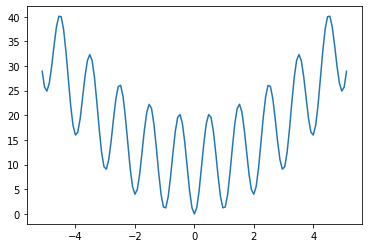

In [144]:
plt.figure()
plt.plot(X, rastrigin(X))
plt.show()

#### Похоже, что нужна многомерная функция. Сделаем X2

In [145]:
X1 = np.linspace(-5.12, 5.13)
X2 = np.linspace(-5.12, 5.13)

In [233]:
def rastrigin(x):
    
    n=2
    
    return A*n + np.sum( ( x[1:]**2 - A * np.cos(2 * np.pi * x[1:]) ) + ( x[:-1]**2 - A * np.cos(2 * np.pi * x[:-1])) , axis=0)

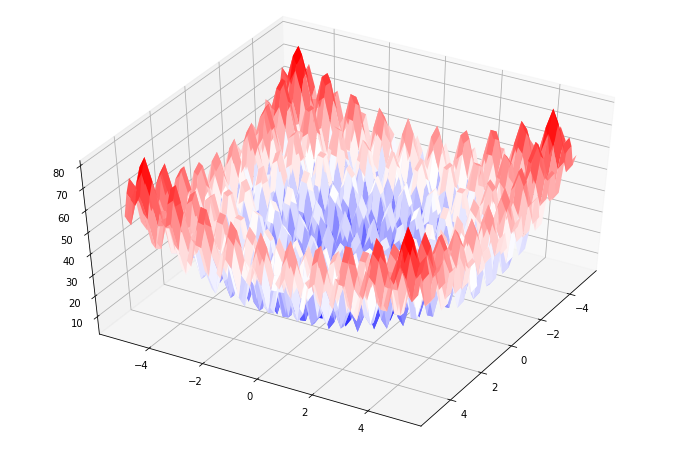

In [234]:
#Нарисуем ее

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=[12,8])
ax = fig.gca(projection='3d')
ax.view_init(45, 30)

X1 = np.linspace(-5.12, 5.13)
X2 = np.linspace(-5.12, 5.13)

X1, X2 = np.meshgrid(X1, X2) 

Z = rastrigin(np.array([X1, X2]))

surf = ax.plot_surface(X1, X2, Z, cmap = 'bwr')
plt.show()

#### Оптимизация

In [235]:
#Пакет для оптимизации
from scipy.optimize  import minimize

In [250]:
#Запускаем оптимизацию, указываем начальную точку, метод и условия успеха
x0 = np.random.uniform(low=-5, high=5, size=(4,))
res = minimize(rastrigin, x0, method='nelder-mead', options = {'xtol': 1e-10, 'disp' : True} )

Optimization terminated successfully.
         Current function value: 11.737608
         Iterations: 208
         Function evaluations: 386


In [251]:
#Координаты оптимальной точки
res.x

array([ 3.97978386,  2.9848557 , -0.99495864,  3.97978386])

In [252]:
#Подставим его в функцию 
print(round(rastrigin(res.x),2))

11.74


In [253]:
#Число итераций
res.nit

208

#### Мультистарт - проводим  эксперимент

In [256]:
#Делаем 100 итераций, собираем 100 результатов и смотрим число расчетов каждый раз

res_dict = {'Среднее значение целевой функции': 0, 'Минимальное найденное значение целевой функции':0, 'Среднее число итераций':0}
respd = pd.DataFrame()
respd['Показатель'] = list(res_dict.keys())

for d in [2,4]:
    
    itlist=[]
    reslist=[]
    
    for kk in range(100):
    
        x0 = np.random.uniform(low=-5, high=5, size=(d,))
        res = minimize(rastrigin, x0, method='nelder-mead', options = {'xtol': 1e-8, 'disp' : False} )
    
        itlist.append(res.nit)
        reslist.append(rastrigin(res.x))
        
    res_dict['Среднее значение целевой функции'] = round(np.mean(reslist), 2)
    res_dict['Минимальное найденное значение целевой функции'] = round(np.min(reslist), 2)
    res_dict['Среднее число итераций'] = round(np.mean(itlist), 2)
        
    respd[f'd={d}'] = list(res_dict.values())

In [257]:
respd

,Показатель,d=2,d=4
0,Среднее значение целевой функции,17.08,14.14
1,Минимальное найденное значение целевой функции,0.00,-34.03
2,Среднее число итераций,61.59,181.97


####  При d=2, минимальное значение функции стремится к 0. При d=4, минимальное значение отрицательное при втрое большем числе итераций - ошибка?